# What _is_ a Jupyter Notebook?
A "notebook" interface is an interactive, live-programming, cell-based, interface to computation.  Think about Mathematica back in the day.  Code, data, tests, and documentation are presented in hunks called "cells" that can be individually executed, reordered, hidden, or shown.

Jupyter is a specific implementation of the notebook concept that runs as a client-server pair where the notebook _interface_ is the client, and the language _kernel_ is the server.  There are many different kernels.  The most popular is Python, but your favorite language is almost certainly available.

What you're looking at now is a notebook using a Python 3 kernel.  The kernel is shown in the upper right-hand corner of the notebook.

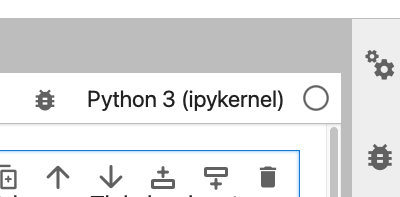

This is a cell.  Each gray box you see below is a separate cell.  This cell is specifically a Markdown cell.  If I "execute" it, it renders the Markdown as prose.  There are also code cells and raw cells.

Using a particular kernel implies that code cells are to be interpreted as _that_ language.

In [ ]:
# Here's a code cell containing Python
#  That makes sense since this notebook is using a Python kernel

person = "Wolf"
print(f"Hello, {person}!  This output is printed outside of any cell.")

# Command/Control-Enter runs the code in the cell
# Shift-Enter runs the cell and activates the next cell

Hello, Wolf!  This output is printed outside of any cell.


### Another Markdown cell
Note the syntax-highlighting in the Python cell.  Let's try auto-complete.  I'll type a period after the `person` variable, then hit tab to engage auto-complete.

In [ ]:
person

# Note that `person` was defined above in completely separate cell.  It was defined as a string, so
#  Jupyter knows to auto-complete with the methods of string.

'Wolf'

### Back to a cell again.  This is yet another Markdown cell.
Note that output from the code cell above appears between the cells, not **in** them.

In [ ]:
# What version of Python are we running?

import sys
print(sys.version)

# again, note the output is not, itself, in a cell

3.10.5 (main, Jun 15 2022, 12:41:18) [Clang 13.1.6 (clang-1316.0.21.2.5)]


In [ ]:
%%javascript
console.log("Look!  I can mix-in JavaScript!")

<IPython.core.display.Javascript object>

In [ ]:
%%bash
printf "Here is some Bash!"

Here is some Bash!

In [ ]:
%%perl
map { print "$_\n" } ( 1 .. 10 )

1
2
3
4
5
6
7
8
9
10


## What do I do with a Jupyter Notebook?
The number one use of a Jupyter Notebook is exploratory programming.  There is so much you _can_ do with a notebook, but that's almost certainly where you'll start and what you'll return to again and again.

# Where did they come from?  What is their history?

# How do you use one?  How does it work?

## Pandas

## Inline documentation

## Tests

## Multiple languages

## Exploration

## Book creation

## GUIs

## Running from a remote server

# Problems and solutions

## Out-of-order execution

## Source-code control

## Modularity

## Debugging

## Things that are better in an IDE or external editor

## Reproducibility

# Where do you find them?  What are they used for?

## Static notebooks living on GitHub

## Teaching notebooks as part of class syllabi

## Research notebooks as the product of experiments

## Books written using Jupyter as their source
[Jupyter Book](https://jupyterbook.org/en/stable/intro.html)

## Report notebooks

## Presentation notebooks
[My `re` presentation](https://github.com/wolf/re-presentation/blob/main/%60re%60%20Presentation.ipynb)

## Notebooks implementing full packages

## The possibilities really are limitless

# How do you install it?

## Installing into a local virtual environment

## Installing globally (no demo)

## Installing with Anaconda (no demo)

## Installing with Docker

## Installing additional kernels for other language